In [1]:
from gensim.models import Word2Vec
import pandas as pd
import re

In [2]:
job_descriptions = [
    "Data scientist with machine learning and Python experience",
    "Machine learning engineer working on NLP and TensorFlow",
    "AI researcher focusing on deep learning and computer vision",
    "Data analyst skilled in SQL, Tableau, and statistics",
    "Business analyst with Excel, PowerBI, and reporting tools",
    "Deep learning engineer with PyTorch and GANs experience",
    "Data engineer with Spark, Hadoop, and ETL pipelines",
    "Python developer working on backend APIs and automation",
    "Research scientist in artificial intelligence and robotics",
    "ML Ops engineer managing model deployment and monitoring"
]

In [3]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.split()

In [4]:
tokenized_jobs = [preprocess(desc) for desc in job_descriptions]

tokenized_jobs

[['data',
  'scientist',
  'with',
  'machine',
  'learning',
  'and',
  'python',
  'experience'],
 ['machine',
  'learning',
  'engineer',
  'working',
  'on',
  'nlp',
  'and',
  'tensorflow'],
 ['ai',
  'researcher',
  'focusing',
  'on',
  'deep',
  'learning',
  'and',
  'computer',
  'vision'],
 ['data', 'analyst', 'skilled', 'in', 'sql', 'tableau', 'and', 'statistics'],
 ['business',
  'analyst',
  'with',
  'excel',
  'powerbi',
  'and',
  'reporting',
  'tools'],
 ['deep',
  'learning',
  'engineer',
  'with',
  'pytorch',
  'and',
  'gans',
  'experience'],
 ['data', 'engineer', 'with', 'spark', 'hadoop', 'and', 'etl', 'pipelines'],
 ['python',
  'developer',
  'working',
  'on',
  'backend',
  'apis',
  'and',
  'automation'],
 ['research',
  'scientist',
  'in',
  'artificial',
  'intelligence',
  'and',
  'robotics'],
 ['ml',
  'ops',
  'engineer',
  'managing',
  'model',
  'deployment',
  'and',
  'monitoring']]

In [5]:
model = Word2Vec(sentences=tokenized_jobs, vector_size=100, window=2, sg=1, min_count=1)

In [6]:
print("Words most similar to 'scientist':")
print(model.wv.most_similar('scientist'))

Words most similar to 'scientist':
[('spark', 0.2686174213886261), ('research', 0.14290694892406464), ('analyst', 0.1281404197216034), ('powerbi', 0.10996197164058685), ('in', 0.10914907604455948), ('python', 0.1089809238910675), ('deployment', 0.10783117264509201), ('tableau', 0.10190024226903915), ('tensorflow', 0.09928195923566818), ('vision', 0.09621099382638931)]


In [7]:
print("\n Words most similar to 'data':")
print(model.wv.most_similar('data'))

print("\n Words most similar to 'engineer':")
print(model.wv.most_similar('engineer'))


 Words most similar to 'data':
[('in', 0.167215034365654), ('ops', 0.16261577606201172), ('on', 0.13864962756633759), ('with', 0.13139627873897552), ('etl', 0.11608903110027313), ('researcher', 0.09771063178777695), ('excel', 0.09649363160133362), ('reporting', 0.08368359506130219), ('vision', 0.07172605395317078), ('statistics', 0.06652409583330154)]

 Words most similar to 'engineer':
[('tensorflow', 0.18913401663303375), ('excel', 0.1889193207025528), ('computer', 0.1608428955078125), ('nlp', 0.15949779748916626), ('deep', 0.1379244178533554), ('deployment', 0.1282002329826355), ('sql', 0.12277571856975555), ('pipelines', 0.11805815994739532), ('backend', 0.09482778608798981), ('vision', 0.0854046642780304)]


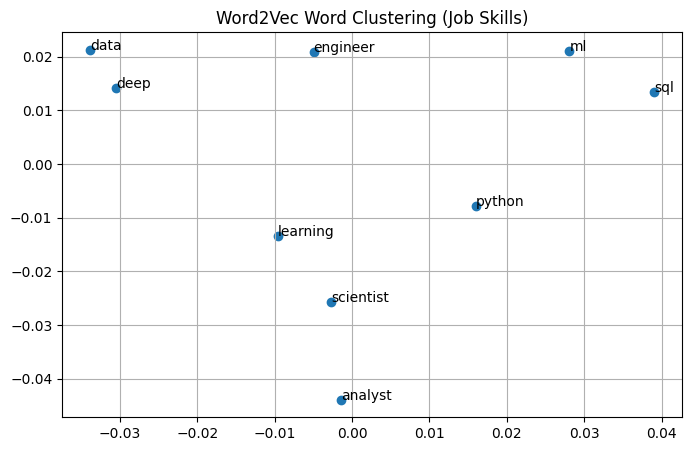

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ['data', 'scientist', 'engineer', 'analyst', 'python', 'sql', 'ml', 'deep', 'learning']
X = [model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(8,5))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Word2Vec Word Clustering (Job Skills)")
plt.grid(True)
plt.show()
